In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
plt.style.use('ggplot')

In [11]:
df = pd.read_csv('sales_data_sample.csv', encoding='latin1')

In [12]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-nu

In [13]:
print("\nFirst 5 rows:")
display(df.head())


First 5 rows:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [14]:
print("Missing values per column:")
print(df.isnull().sum())


Missing values per column:
ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64


In [15]:
if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year

In [16]:
print("\nData types:")
print(df.dtypes)


Data types:
ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object


In [17]:
print("Summary Statistics:")
display(df.describe())

Summary Statistics:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [18]:
if 'sales' in df.columns:
    total_sales = df['sales'].sum()
    print(f"\nTotal Sales: ${total_sales:,.2f}")

In [19]:
if 'category' in df.columns:
    print("\nSales by Category:")
    category_counts = df['category'].value_counts()
    display(category_counts)

In [20]:
# Example aggregations - adjust based on actual columns

In [21]:
if all(col in df.columns for col in ['month', 'year', 'sales']):
    monthly_sales = df.groupby(['year', 'month'])['sales'].sum().reset_index()
    print("\nMonthly Sales:")
    display(monthly_sales)


In [22]:
if 'category' in df.columns and 'sales' in df.columns:
    category_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
    print("\nSales by Category:")
    display(category_sales)

In [23]:
if 'region' in df.columns and 'sales' in df.columns:
    region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
    print("\nSales by Region:")
    display(region_sales)

In [24]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [25]:
if all(col in df.columns for col in ['month', 'year', 'sales']):
    monthly_sales.plot(x=['year', 'month'], y='sales', kind='line', 
                      title='Monthly Sales Trend', marker='o')
    plt.ylabel('Sales Amount ($)')
    plt.show()

In [26]:
if 'category' in df.columns and 'sales' in df.columns:
    category_sales.plot(kind='bar', title='Sales by Product Category')
    plt.ylabel('Sales Amount ($)')
    plt.xticks(rotation=45)
    plt.show()

In [27]:
if 'region' in df.columns and 'sales' in df.columns:
    region_sales.plot(kind='pie', autopct='%1.1f%%', 
                     title='Sales Distribution by Region')
    plt.ylabel('')
    plt.show()

In [28]:
if 'product' in df.columns and 'sales' in df.columns:
    top_products = df.groupby('product')['sales'].sum().nlargest(10)
    top_products.plot(kind='barh', title='Top 10 Selling Products')
    plt.xlabel('Sales Amount ($)')
    plt.show()

In [29]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
if len(numerical_cols) > 1:
    print("\nCorrelation Matrix:")
    display(df[numerical_cols].corr())


Correlation Matrix:


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
ORDERNUMBER,1.000000,0.065543,-0.002935,-0.055550,0.039919,-0.051383,-0.039723,0.904596,-0.010280
QUANTITYORDERED,0.065543,1.000000,0.005564,-0.018397,0.551426,-0.035323,-0.039048,0.069535,0.017881
PRICEEACH,-0.002935,0.005564,1.000000,-0.020965,0.657841,0.008712,0.005152,-0.005938,0.670625
ORDERLINENUMBER,-0.055550,-0.018397,-0.020965,1.000000,-0.058400,0.040716,0.034016,-0.057367,-0.021067
SALES,0.039919,0.551426,0.657841,-0.058400,1.000000,-0.006796,-0.009605,0.035647,0.635239
QTR_ID,-0.051383,-0.035323,0.008712,0.040716,-0.006796,1.000000,0.979300,-0.433052,0.010234
MONTH_ID,-0.039723,-0.039048,0.005152,0.034016,-0.009605,0.979300,1.000000,-0.430163,0.008170
YEAR_ID,0.904596,0.069535,-0.005938,-0.057367,0.035647,-0.433052,-0.430163,1.000000,-0.014310
MSRP,-0.010280,0.017881,0.670625,-0.021067,0.635239,0.010234,0.008170,-0.014310,1.000000


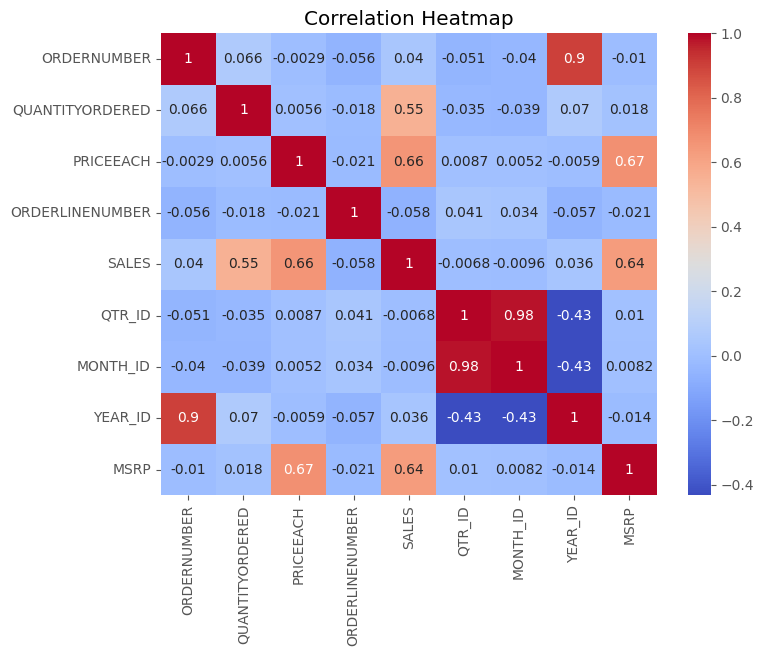

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [33]:
if 'date' in df.columns and 'sales' in df.columns:
    try:
        from statsmodels.tsa.seasonal import seasonal_decompose
        
        ts_df = df.set_index('date')['sales'].asfreq('D').fillna(method='ffill')
        decomposition = seasonal_decompose(ts_df, model='additive', period=30)
        
        decomposition.plot()
        plt.suptitle('Sales Time Series Decomposition')
        plt.tight_layout()
        plt.show()
    except ImportError:
        print("statsmodels not installed. Install with: pip install statsmodels")

In [34]:
df.to_csv('cleaned_sales_data.csv', index=False)

if all(col in df.columns for col in ['month', 'year', 'sales']):
    plt.figure(figsize=(10, 6))
    monthly_sales.plot(x=['year', 'month'], y='sales', kind='line', 
                      title='Monthly Sales Trend', marker='o')
    plt.ylabel('Sales Amount ($)')
    plt.savefig('monthly_sales_trend.png')
    plt.close()